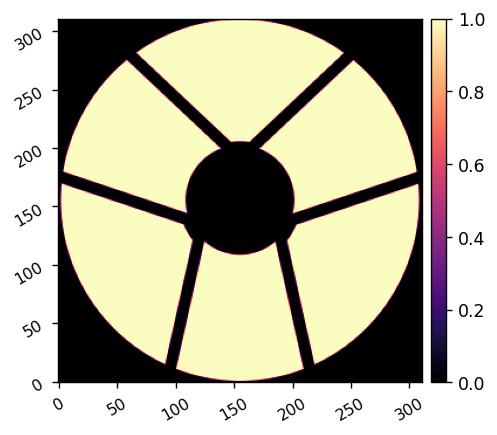

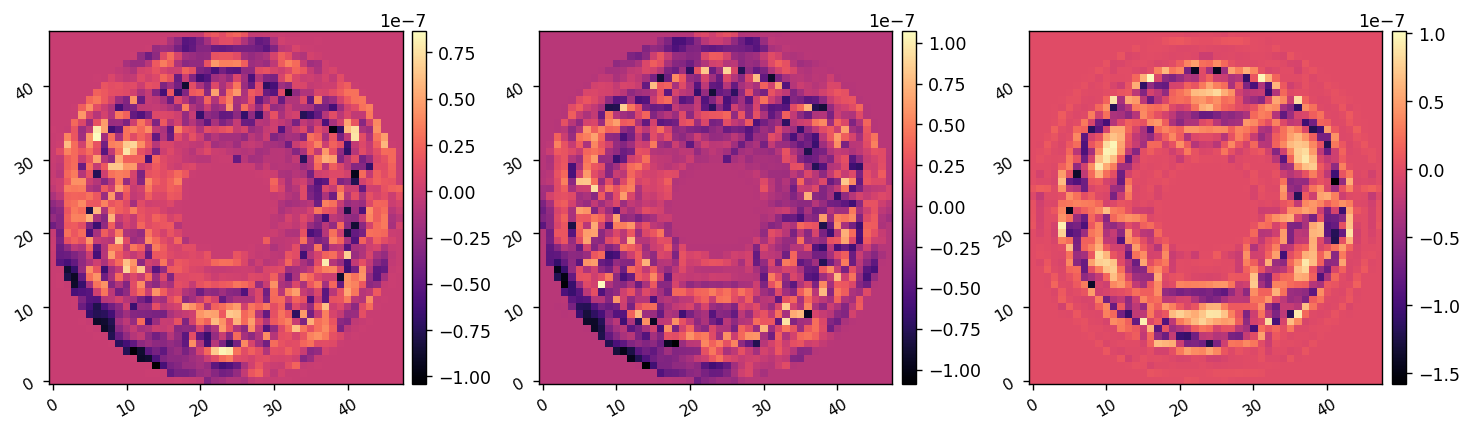

In [14]:
import numpy as np
import astropy.io.fits as fits
import astropy.units as u
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

from IPython.display import clear_output, display
import time
from pathlib import Path
import copy

import proper
# proper.prop_use_ffti()
proper.prop_use_fftw()

import roman_phasec_proper

import cgi_phasec_poppy as cgi
import cgi_phasec_poppy.imshows as imshows
from cgi_phasec_poppy.imshows import *
import ray

from importlib import reload

data_dir = Path('/groups/douglase/kians-data-files/disk-processing')
data_dir = Path('/npool/nvme/kianmilani/disk-data')

pupil = fits.getdata(roman_phasec_proper.data_dir + '/hlc_20190210b/pupil.fits')
npup = pupil.shape[0]
imshow1(pupil)

dm1_best = fits.getdata(roman_phasec_proper.lib_dir + r'/examples/hlc_best_contrast_dm1.fits')
dm2_best = fits.getdata(roman_phasec_proper.lib_dir + r'/examples/hlc_best_contrast_dm2.fits')
imshow3(dm1_best, dm2_best, dm1_best-dm2_best)

wavelength_c = 575e-9*u.m
D = 2.3631*u.m
mas_per_lamD = (wavelength_c/D*u.radian).to(u.mas)

iwa = 2.8
owa = 9.7

iwa_as = iwa*mas_per_lamD/1000
owa_as = owa*mas_per_lamD/1000

psf_pixelscale_mas = 20.8*u.mas/u.pix
psf_pixelscale_lamD = psf_pixelscale_mas.value / mas_per_lamD.value

polaxis = 2

iwa = 2.8
owa = 9.7

In [2]:
nlam = 7
lam0 = 0.575
bandwidth = 0.1
minlam = lam0 * (1 - bandwidth/2)
maxlam = lam0 * (1 + bandwidth/2)
lam_array = np.linspace( minlam, maxlam, nlam )

npsf = 64

dm1 = proper.prop_fits_read( roman_phasec_proper.lib_dir + r'/examples/hlc_best_contrast_dm1.fits' )
dm2 = proper.prop_fits_read( roman_phasec_proper.lib_dir + r'/examples/hlc_best_contrast_dm2.fits' )

options = {
    'cor_type':'hlc', # change coronagraph type to correct band
    'final_sampling_lam0':psf_pixelscale_lamD, 
    'source_x_offset':0,
    'source_y_offset':0,
    'use_fpm':1,
    'use_field_stop':1,
    'use_errors':1,
    'use_lens_errors':1,
    'use_hlc_dm_patterns':0,
    'use_dm1':1, 'dm1_m':dm1, 
    'use_dm2':1, 'dm2_m':dm2,
    'polaxis':polaxis,   
}




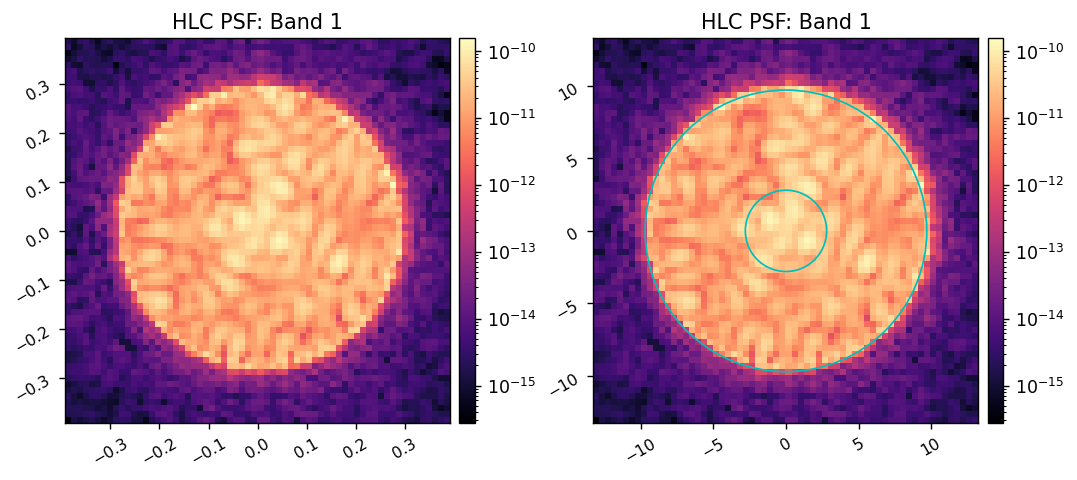

In [4]:
(wfs, pxscls_m) = proper.prop_run_multi('roman_phasec', lam_array, npsf, QUIET=True, PASSVALUE=options)

psfs = np.abs(wfs)**2
psf_bb = np.sum(psfs, axis=0)/nlam
psf_pixelscale_m = pxscls_m[0]*u.m/u.pix

patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
imshow2(psf_bb, psf_bb, 'HLC PSF: Band 1', 'HLC PSF: Band 1',
        lognorm1=True, lognorm2=True, 
        pxscl1=psf_pixelscale_m.to(u.mm/u.pix), pxscl2=psf_pixelscale_lamD, patches2=patches)

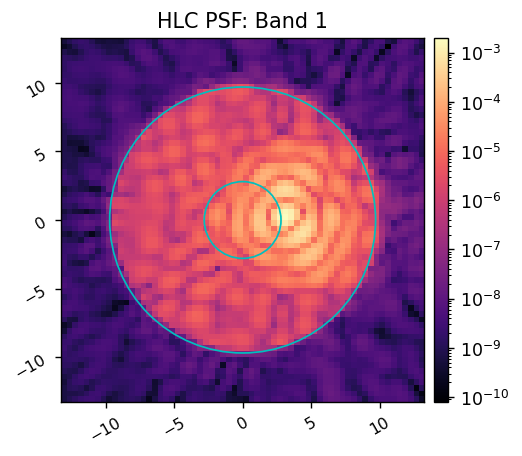

In [45]:
psf_1_offset = 2.5
psf_1_offset_as = psf_1_offset*mas_per_lamD/1000
options.update({
    'source_x_offset':psf_1_offset, 
})

(wfs, pxscls_m) = proper.prop_run_multi('roman_phasec', lam_array, npsf, QUIET=True, PASSVALUE=options)

psfs = np.abs(wfs)**2
psf_1 = np.sum(psfs, axis=0)/nlam
psf_pixelscale_m = pxscls_m[0]*u.m/u.pix

patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
imshow1(psf_1, 'HLC PSF: Band 1', lognorm=1, pxscl=psf_pixelscale_lamD, patches=patches)

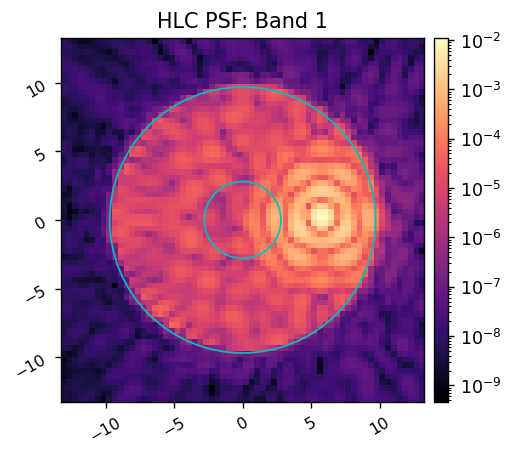

In [46]:
psf_2_offset = 5.5
psf_2_offset_as = psf_2_offset*mas_per_lamD/1000
options.update({
    'source_x_offset':psf_2_offset, 
})

(wfs, pxscls_m) = proper.prop_run_multi('roman_phasec', lam_array, npsf, QUIET=True, PASSVALUE=options)

psfs = np.abs(wfs)**2
psf_2 = np.sum(psfs, axis=0)/nlam
psf_pixelscale_m = pxscls_m[0]*u.m/u.pix

patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
imshow1(psf_2, 'HLC PSF: Band 1', lognorm=1, pxscl=psf_pixelscale_lamD, patches=patches)

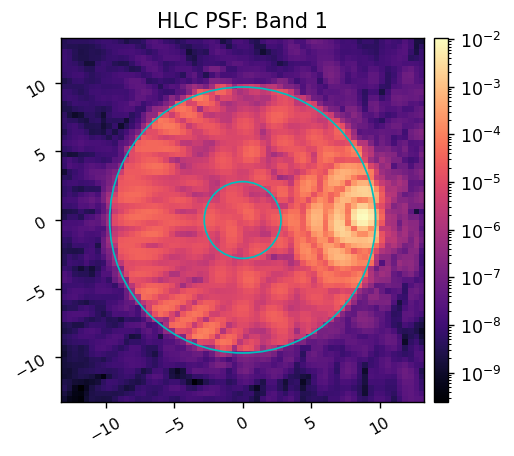

In [44]:
psf_3_offset = 8.5
psf_3_offset_as = psf_3_offset*mas_per_lamD/1000
options.update({
    'source_x_offset':psf_3_offset, 
})


(wfs, pxscls_m) = proper.prop_run_multi('roman_phasec', lam_array, npsf, QUIET=True, PASSVALUE=options)

psfs = np.abs(wfs)**2
psf_3 = np.sum(psfs, axis=0)/nlam
psf_pixelscale_m = pxscls_m[0]*u.m/u.pix

patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
imshow1(psf_3, 'HLC PSF: Band 1', lognorm=1, pxscl=psf_pixelscale_lamD, patches=patches)

In [41]:
2.5*mas_per_lamD/1000

<Quantity 0.12547317 mas>

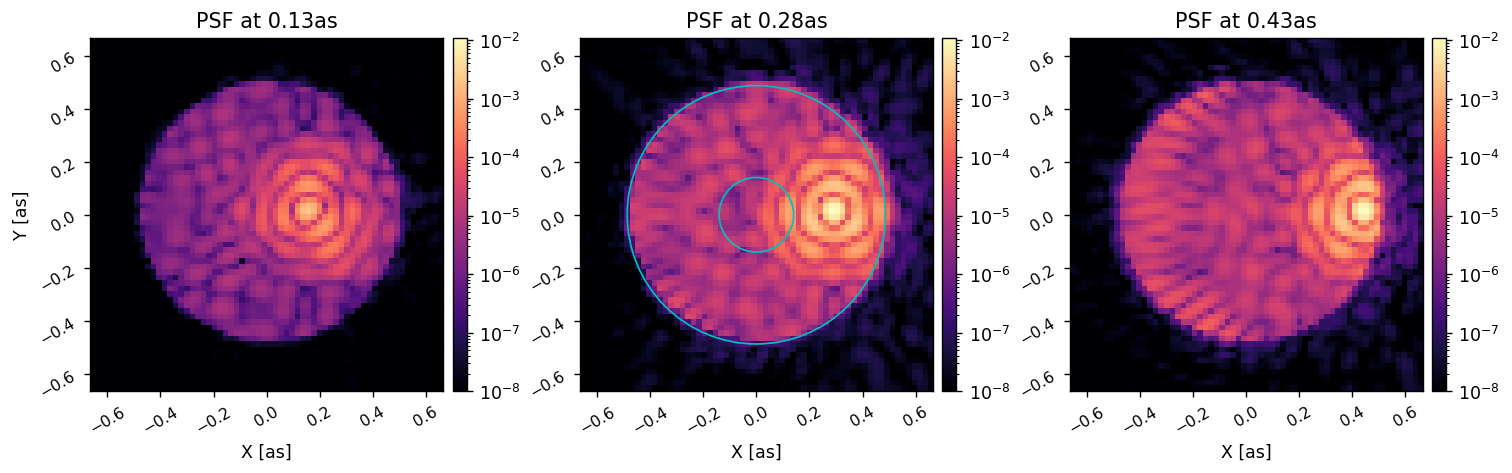

In [48]:
vmax = np.max(np.array([psf_1, psf_2, psf_3]))
vmin = 1e-8
fig, ax = imshow3(
    psf_1, psf_2, psf_3, 
    f'PSF at {psf_1_offset_as.value:.2f}as', 
    f'PSF at {psf_2_offset_as.value:.2f}as', 
    f'PSF at {psf_3_offset_as.value:.2f}as', 
    pxscl=psf_pixelscale_mas/1000,
    lognorm=1, 
    vmin1=vmin, vmin2=vmin, vmin3=vmin,
    vmax1=vmax, vmax2=vmax, vmax3=vmax, 
    # patches1=[Circle((0, 0), iwa_as.value, color='c', fill=False), Circle((0, 0), owa_as.value, color='c', fill=False)],
    patches2=[Circle((0, 0), iwa_as.value, color='c', fill=False), Circle((0, 0), owa_as.value, color='c', fill=False)],
    return_fig=True, display_fig=False, 
)
ax[0].set_xlabel('X [as]')
ax[0].set_ylabel('Y [as]')

ax[1].set_xlabel('X [as]')
ax[2].set_xlabel('X [as]')

fig.savefig('figs/prf_examples.pdf', format='pdf', bbox_inches="tight")
display(fig)


# Do convolution with a masked off-axis PSF

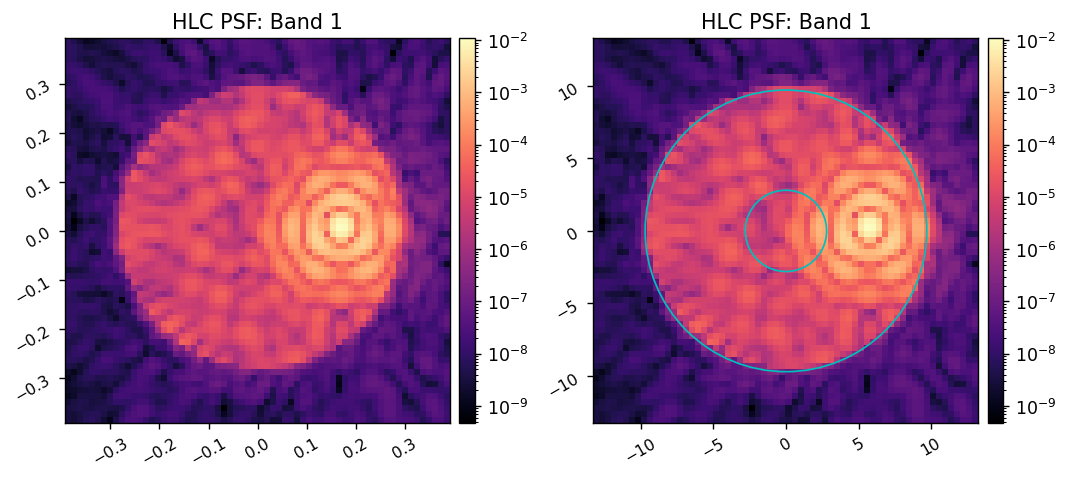

In [3]:
options.update({
    'source_x_offset':5.5, 
})

(wfs, pxscls_m) = proper.prop_run_multi('roman_phasec', lam_array, npsf, QUIET=True, PASSVALUE=options)

psfs = np.abs(wfs)**2
psf_bb = np.sum(psfs, axis=0)/nlam
psf_pixelscale_m = pxscls_m[0]*u.m/u.pix

patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
imshow2(psf_bb, psf_bb, 'HLC PSF: Band 1', 'HLC PSF: Band 1',
        lognorm1=True, lognorm2=True, 
        pxscl1=psf_pixelscale_m.to(u.mm/u.pix), pxscl2=psf_pixelscale_lamD, patches2=patches)

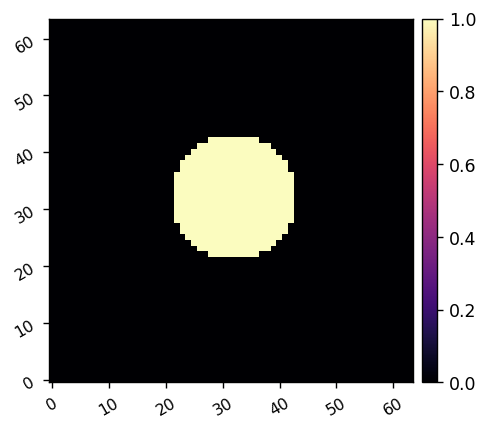

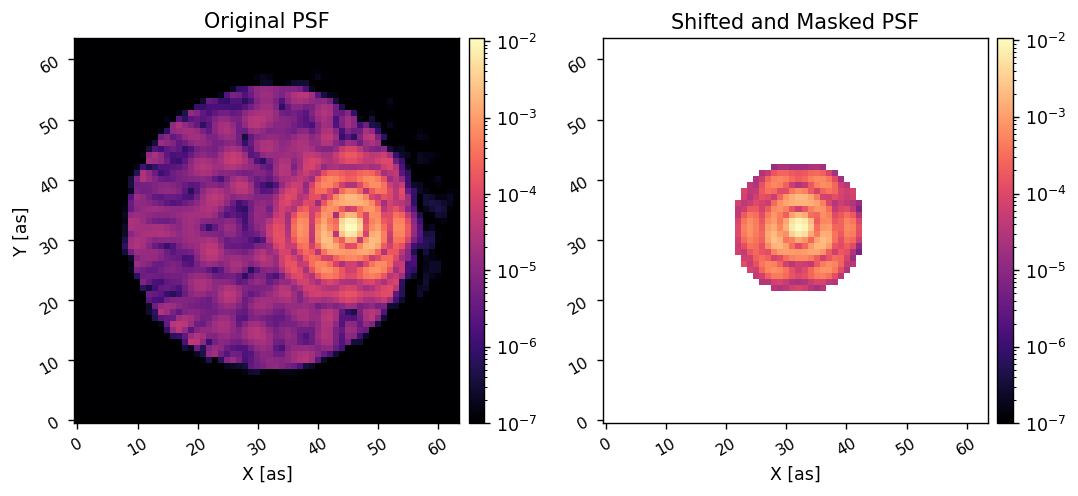

In [52]:
y,x = (np.indices((npsf, npsf)) - npsf//2 )*psf_pixelscale_lamD
r = np.sqrt(x**2 + y**2)

psf_mask = (r<4.5)
imshow1(psf_mask)
import scipy

shift = -5.5/psf_pixelscale_lamD
shifted_psf = scipy.ndimage.shift(psf_bb, (0, shift), order=1)
masked_psf = shifted_psf * psf_mask

vmin = 1e-7
fig, ax = imshow2(
    psf_bb, masked_psf, 
    'Original PSF', 'Shifted and Masked PSF', 
    lognorm=True, 
    vmin1=vmin, vmin2=vmin,
    return_fig=True, display_fig=False, 
)
ax[0].set_xlabel('X [as]')
ax[0].set_ylabel('Y [as]')

ax[1].set_xlabel('X [as]')

fig.savefig('figs/masked_psf.pdf', format='pdf', bbox_inches="tight")
display(fig)

13.91213703707236


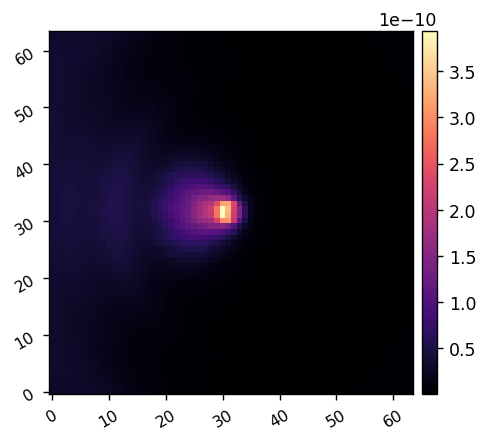

Saved data to:  image_sim_convolution.fits


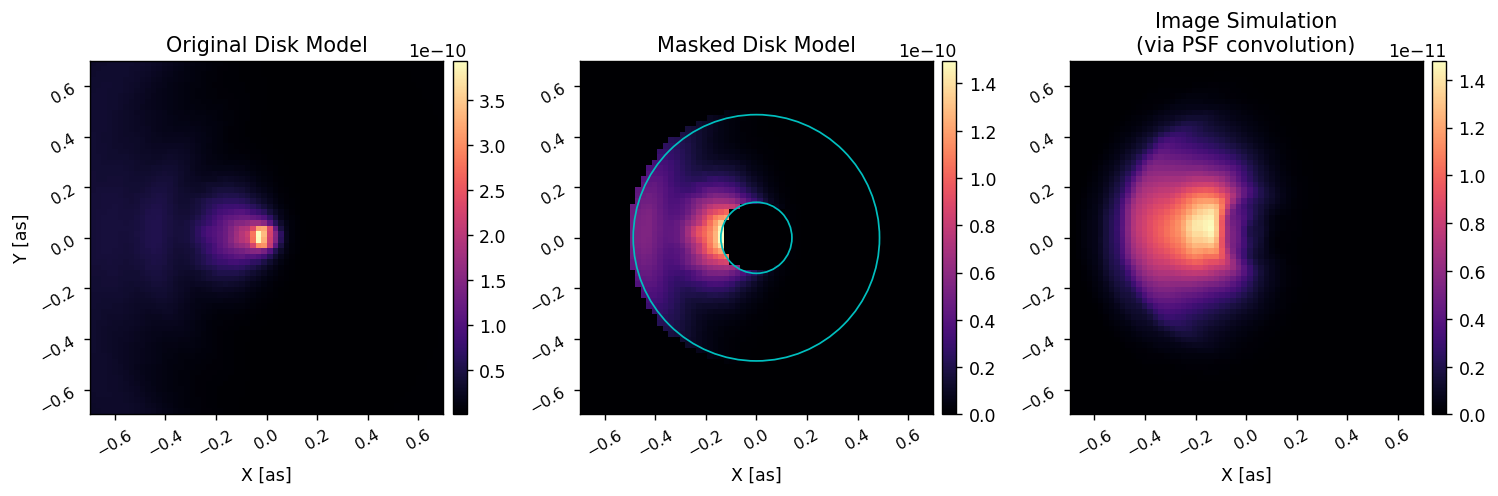

In [27]:
disk = fits.getdata('I_0_eps_eri.fits')

ndisk = 64
disk_pixelscale_mas = 21.82*u.mas/u.pix
disk_pixelscale_lamD = disk_pixelscale_mas /mas_per_lamD
disk_extent = ndisk/2*disk_pixelscale_mas/mas_per_lamD
print(disk_extent.value)

disk = utils.pad_or_crop(disk, ndisk) # crop it to our region of interest
imshow1(disk)

y,x = (np.indices((ndisk, ndisk)) - ndisk//2 + 1/2)*psf_pixelscale_lamD
r = np.sqrt(x**2 + y**2)
disk_mask = (r>=2.7) * (r<9.7)
masked_disk = disk*disk_mask


conv_im = scipy.signal.convolve2d(masked_disk, masked_psf, mode='same')
utils.save_fits('image_sim_convolution.fits', conv_im)

fig, ax = imshow3(
    disk, masked_disk, conv_im,
    'Original Disk Model', 'Masked Disk Model',
    'Image Simulation\n(via PSF convolution)',
    pxscl=disk_pixelscale_mas/1000,
    # patches1=[Circle((0, 0), iwa_as.value, color='c', fill=False), Circle((0, 0), owa_as.value, color='c', fill=False)],
    patches2=[Circle((0, 0), iwa_as.value, color='c', fill=False), Circle((0, 0), owa_as.value, color='c', fill=False)],
    return_fig=True, display_fig=False, 
)
ax[0].set_xlabel('X [as]')
ax[0].set_ylabel('Y [as]')

ax[1].set_xlabel('X [as]')
ax[2].set_xlabel('X [as]')

fig.savefig('figs/disk_conv_standard.pdf', format='pdf', bbox_inches="tight")
display(fig)




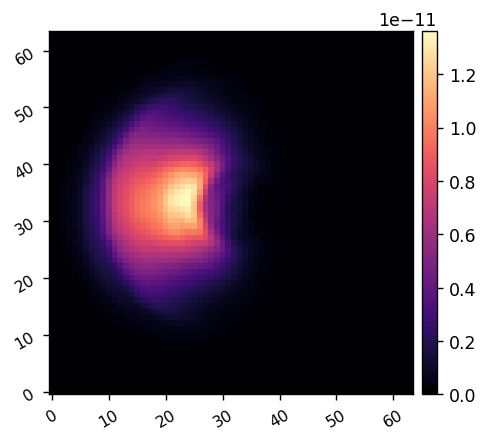

Saved data to:  image_sim_convolution.fits


In [28]:
import scipy.signal

image = scipy.signal.convolve2d(masked_disk, masked_psf, mode='same')
imshow1(image)

utils.save_fits('image_sim_convolution.fits', image)